In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [12]:
def binomial_test(sample_size, defective_items, defective_rate, confidence_level):
    """
    使用二项分布进行假设检验
    :param sample_size: 样本大小
    :param defective_items: 样本中次品的数量
    :param defective_rate: 标称次品率(如10%)
    :param confidence_level: 检验的置信水平
    :return: 是否接受零配件
    """
    # 计算假设次品率下的显著性水平
    alpha = 1 - confidence_level
    # 使用 binomtest 进行检验，计算拒绝零假设的 p 值
    result = stats.binomtest(defective_items, sample_size, defective_rate, alternative='greater')
    
    # 如果 p 值小于显著性水平，则拒绝零假设
    if result.pvalue < alpha:
        return f"拒收零配件 (p-value: {result.pvalue:.5f})"
    else:
        return f"接收零配件 (p-value: {result.pvalue:.5f})"

这里使用了 stats.binomtest 来进行二项分布检验。它的参数包括：

defective_items: 样本中次品的数量。

sample_size: 样本大小。

defective_rate: 标称次品率。

alternative='greater': 表示我们进行的是单尾检验，检验的假设是实际次品率是否大于标称次品率。

返回的 result 对象包含了 p-value，用于判断检验结果。

这个函数使用二项分布进行假设检验，判断样本中的次品率是否符合指定的标称次品率。

sample_size: 样本的总大小，即抽取的物品数量。
defective_items: 样本中被检测为次品的物品数量。
defective_rate: 标称次品率，即制造商或规范中规定的次品率（比如10%）。
confidence_level: 置信水平，决定显著性水平的反向值（1 - 置信水平）。

In [13]:
def calculate_min_sample_size(defective_rate, confidence_level, error_margin):
    """
    计算最小样本量，满足置信水平和误差率要求
    :param defective_rate: 标称次品率
    :param confidence_level: 置信水平
    :param error_margin: 允许的误差率
    :return: 最小样本量
    """
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    sample_size = (z_score ** 2 * defective_rate * (1 - defective_rate)) / (error_margin ** 2)
    return int(np.ceil(sample_size))

z_score 是对应于置信水平的正态分布的临界值。例如，95% 的置信水平对应于大约 1.96 的 z 分数。
stats.norm.ppf 函数通过概率值计算出对应的 z 分数。

使用统计公式计算样本量。公式源自正态分布和二项分布的结合，旨在计算给定置信水平和误差范围下所需的样本量。
z_score ** 2: z 分数的平方。
defective_rate * (1 - defective_rate): 次品率和良品率的乘积，用于二项分布。
error_margin: 允许的误差范围。
计算完成后，使用 np.ceil 向上取整，保证样本量是整数。

In [14]:
# 设置标称次品率和置信度
defective_rate = 0.10  # 标称次品率为 10%
confidence_level_95 = 0.95  # 95%的置信水平
confidence_level_90 = 0.90  # 90%的置信水平
error_margin = 0.02  # 允许的误差范围

In [15]:
# 计算最小样本量
sample_size_95 = calculate_min_sample_size(defective_rate, confidence_level_95, error_margin)
sample_size_90 = calculate_min_sample_size(defective_rate, confidence_level_90, error_margin)

print(f"95% 置信水平下的最小样本量: {sample_size_95}")
print(f"90% 置信水平下的最小样本量: {sample_size_90}")

95% 置信水平下的最小样本量: 865
90% 置信水平下的最小样本量: 609


In [16]:
# 假设我们检测到样本中的次品数量
detected_defective_items = 12  # 假设样本中有 12 个次品

# 对两种置信水平进行二项分布假设检验
result_95 = binomial_test(sample_size_95, detected_defective_items, defective_rate, confidence_level_95)
result_90 = binomial_test(sample_size_90, detected_defective_items, defective_rate, confidence_level_90)

print(f"95% 置信水平结果: {result_95}")
print(f"90% 置信水平结果: {result_90}")

95% 置信水平结果: 接收零配件 (p-value: 1.00000)
90% 置信水平结果: 接收零配件 (p-value: 1.00000)


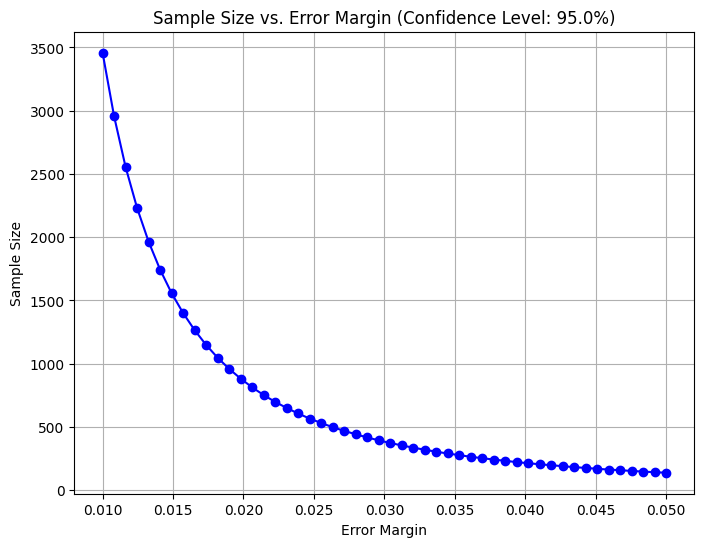

In [18]:
# 画图部分 1：样本量随误差范围的变化
def plot_sample_size_vs_error(defective_rate, confidence_level, error_margins):
    sample_sizes = [calculate_min_sample_size(defective_rate, confidence_level, e) for e in error_margins]
    
    plt.figure(figsize=(8, 6))
    plt.plot(error_margins, sample_sizes, marker='o', color='b')
    plt.title(f"Sample Size vs. Error Margin (Confidence Level: {confidence_level*100}%)")
    plt.xlabel("Error Margin")
    plt.ylabel("Sample Size")
    plt.grid(True)
    plt.show()

# 误差范围的变化
error_margins = np.linspace(0.01, 0.05, 50)
plot_sample_size_vs_error(defective_rate, confidence_level_95, error_margins)


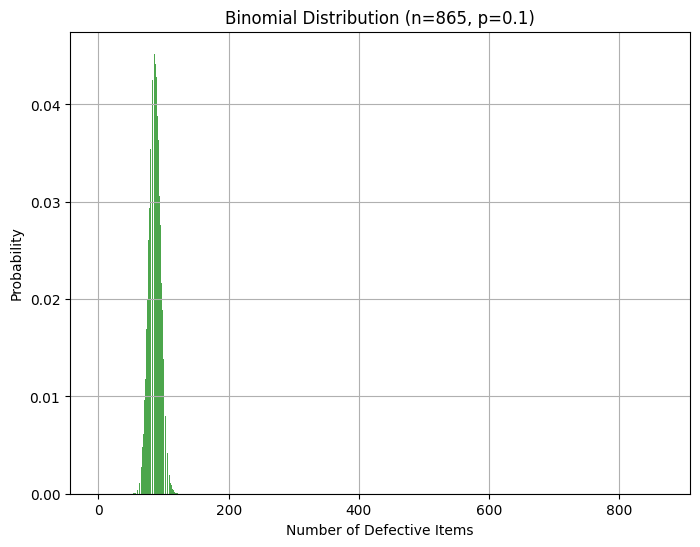

In [21]:
# 画图部分 2：二项分布概率分布图
def plot_binomial_distribution(sample_size, defective_rate):
    x = np.arange(0, sample_size + 1)
    probabilities = stats.binom.pmf(x, sample_size, defective_rate)
    
    plt.figure(figsize=(8, 6))
    plt.bar(x, probabilities, color='green', alpha=0.7)
    plt.title(f"Binomial Distribution (n={sample_size}, p={defective_rate})")
    plt.xlabel("Number of Defective Items")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.show()

# 绘制二项分布的概率分布图
plot_binomial_distribution(sample_size_95, defective_rate)